In [ ]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database you created in Task 3
conn = psycopg2.connect(
    dbname="bank_reviews",
    user="postgres",
    password="6565", 
    host="localhost"
)

# SQL Query to join the tables
query = """
SELECT b.bank_name, r.rating, r.sentiment_label, r.theme, r.review_text
FROM reviews r
JOIN banks b ON r.bank_id = b.bank_id;
"""
df = pd.read_sql(query, conn)
conn.close()
print("Successfully loaded data from PostgreSQL!")

Successfully loaded data from PostgreSQL!


C:\Users\hp\AppData\Local\Temp\ipykernel_18532\2318356776.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


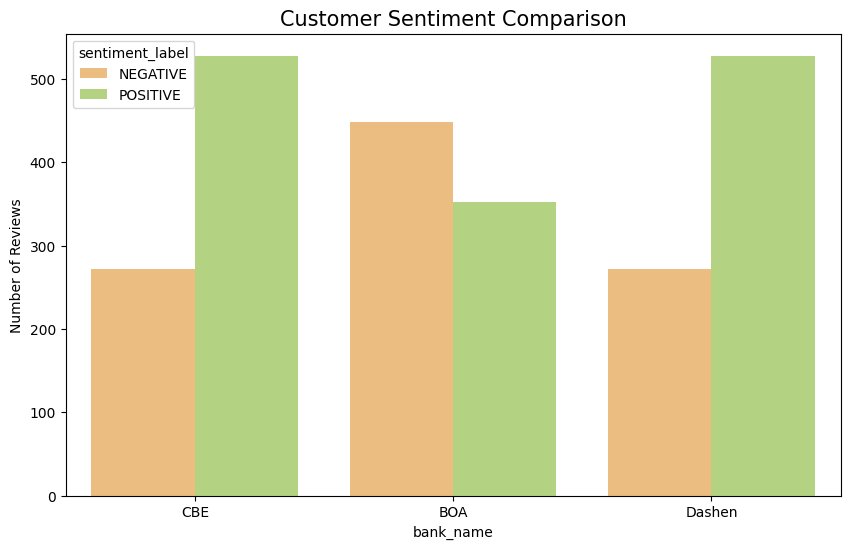

In [2]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bank_name', hue='sentiment_label', palette='RdYlGn')
plt.title('Customer Sentiment Comparison', fontsize=15)
plt.ylabel('Number of Reviews')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_18532\1506307131.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='bank_name', y='rating', palette='Set2')


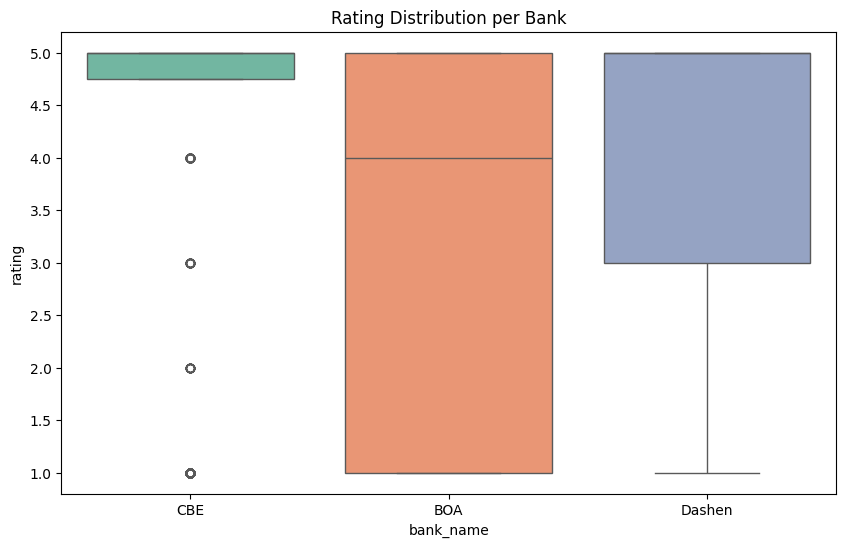

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bank_name', y='rating', palette='Set2')
plt.title('Rating Distribution per Bank')
plt.show()

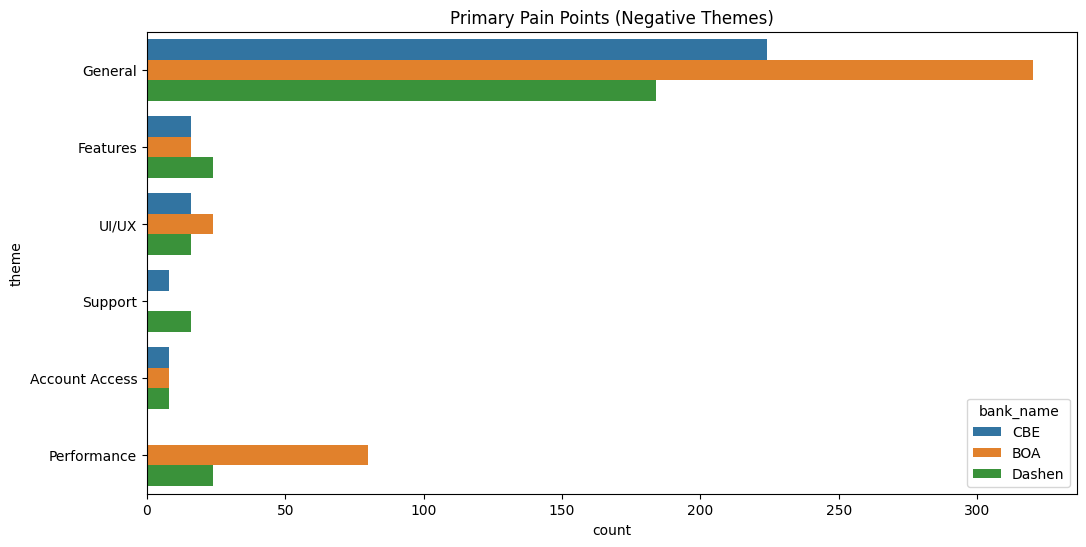

In [5]:
# Create a chart for Negative Reviews to find Pain Points
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['sentiment_label']=='NEGATIVE'], y='theme', hue='bank_name')
plt.title('Primary Pain Points (Negative Themes)')
plt.show()